# Yelp Data Challenge - Clustering and PCA

BitTiger DS501

Nov 2017

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
plt.style.use("ggplot")

In [21]:
df = pd.read_csv('dataset/last_1_years_restaurant_reviews.csv')

In [22]:
df.head()

,business_id,name,categories,avg_stars,cool,date,funny,review_id,stars,text,useful,user_id
0,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"[Cajun/Creole, Steakhouses, Restaurants]",4.0,0,2017-02-14,0,Xp3ppynEvVu1KxDHQ3ae8w,5,Delmonico Steakhouse is a steakhouse owned by ...,0,KC8H7qTZVPIEnanw9fG43g
1,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"[Cajun/Creole, Steakhouses, Restaurants]",4.0,1,2017-05-28,0,LEzphAnz0vKE32PUCbjLgQ,4,One of the top steak places I've had in Vegas ...,2,3RTesI_MAwct13LWm4rhLw
2,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"[Cajun/Creole, Steakhouses, Restaurants]",4.0,0,2017-08-25,0,4e-cxYVdlIu2ZDxVJqUfOQ,5,This place is superb from the customer service...,0,EAOt1UQhJD0GG3l_jv7rWA
3,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"[Cajun/Creole, Steakhouses, Restaurants]",4.0,1,2017-02-12,1,heZd0W3HuPJxZBrCYD3wDw,2,"Lousy steak. \n\nThe service was great - Todd,...",3,OtKA03ALQQ1CBhtaJod_Jw
4,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"[Cajun/Creole, Steakhouses, Restaurants]",4.0,0,2017-12-10,0,exzXjy7Y2ICX_BEVTDWpJA,5,I got the filet mignon with seared foigras and...,0,Ymtd4cQypep_QZJ-qJsHuA


## 1. Cluster the review text data for all the restaurants

### Define your feature variables, here is the text of the review

In [23]:
# Take the values of the column that contains review text data, save to a variable named "documents"
documents = df['text'].values

### Define your target variable (any categorical variable that may be meaningful)

#### For example, I am interested in perfect (5 stars) and imperfect (1-4 stars) rating

In [24]:
# Make a column and take the values, save to a variable named "target"
df['favorable'] = (df['stars'] > 4)
target = df['favorable'].values

#### You may want to look at the statistic of the target variable

In [25]:
# To be implemented
target.mean()

0.49041002371746206

### Create training dataset and test dataset

In [26]:
from sklearn.cross_validation import train_test_split

In [27]:
# documents is your X, target is your y
# Now split the data to training set and test set
# You may want to start with a big "test_size", since large training set can easily crash your laptop.
documents_train, documents_test, target_train, target_test = train_test_split(
    documents,
    target,
    test_size = 0.4,
    random_state = 7
)

### Get NLP representation of the documents

#### Fit TfidfVectorizer with training data only, then tranform all the data to tf-idf

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [29]:
# Create TfidfVectorizer, and name it vectorizer, choose a reasonable max_features, e.g. 1000
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)

In [30]:
# Train the model with your training data
vectors_train = vectorizer.fit_transform(documents_train).toarray()

In [31]:
# Get the vocab of your tfidf
words = vectorizer.get_feature_names()

In [32]:
# Use the trained model to transform all the reviews
vectors_documents = vectorizer.transform(documents).toarray()

### Cluster reviews with KMeans

#### Fit k-means clustering with the training vectors and apply it on all the data

In [33]:
# To be implemented
from sklearn.cluster import KMeans
kmeans = KMeans()
kmeans.fit(vectors_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

#### Make predictions on all your data

In [34]:
# To be implemented
assigned_cluster = kmeans.predict(vectors_documents)

In [36]:
print assigned_cluster

[4 4 6 ... 0 6 4]


#### Inspect the centroids
To find out what "topics" Kmeans has discovered we must inspect the centroids. Print out the centroids of the Kmeans clustering.

   These centroids are simply a bunch of vectors.  To make any sense of them we need to map these vectors back into our 'word space'.  Think of each feature/dimension of the centroid vector as representing the "average" review or the average occurances of words for that cluster.

In [35]:
# To be implemented
print kmeans.cluster_centers_

[[ 1.85716540e-03  9.22793628e-05  2.01704809e-04 ...  8.68565917e-04
   2.36119689e-04  1.03269483e-03]
 [ 1.20026254e-03  4.29657360e-05  2.54741548e-04 ...  5.11664420e-04
   4.63203560e-05  4.26470838e-04]
 [ 3.81910188e-03  1.55799943e-04  6.17079054e-04 ...  3.25583421e-03
   1.31270226e-04  3.35319538e-04]
 ...
 [ 2.56579480e-03  3.56248369e-04  1.41219516e-04 ...  7.87062341e-04
  -4.58075418e-18  2.27304700e-03]
 [ 5.18841438e-04  6.23602170e-05  9.21480365e-05 ...  2.23789680e-04
   5.04020327e-05  3.02964531e-04]
 [ 1.96645902e-03 -5.01443505e-18  3.27325752e-04 ...  4.03628013e-04
   5.40080371e-05  1.19364774e-04]]


#### Find the top 10 features for each cluster.
For topics we are only really interested in the most present words, i.e. features/dimensions with the greatest representation in the centroid.  Print out the top ten words for each centroid.

* Sort each centroid vector to find the top 10 features
* Go back to your vectorizer object to find out what words each of these features corresponds to.


In [37]:
# To be implemented
n = 10
top_centroids = kmeans.cluster_centers_.argsort()[:,-1:-n:-1]

a = np.random.randn(10)
a

array([ 1.25023142, -0.91470511,  1.41091291, -2.4033886 , -0.73543354,
        0.94267213, -0.13778726,  0.61215979,  0.92328027,  0.3113292 ])

In [38]:
for num, centroid in enumerate(top_centroids):
    print (num,",".join(words[i] for i in centroid))

(0, u'chicken,fried,rice,food,good,thai,ordered,place,ramen')
(1, u'good,food,really,place,service,nice,pretty,like,great')
(2, u'order,food,minutes,time,just,service,came,didn,said')
(3, u'pizza,crust,good,place,great,cheese,slice,order,best')
(4, u'food,place,vegas,best,delicious,amazing,service,time,love')
(5, u'burger,fries,burgers,good,place,cheese,great,food,shake')
(6, u'great,food,service,place,amazing,friendly,definitely,awesome,love')
(7, u'sushi,rolls,place,roll,ayce,great,good,fresh,fish')


#### Try different k
If you set k == to a different number, how does the top features change?

In [39]:
# To be implemented
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=6)
kmeans.fit(vectors_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

#### Print out the rating and review of a random sample of the reviews assigned to each cluster to get a sense of the cluster.

In [40]:
# To be implemented
np.unique(assigned_cluster)

array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int32)

In [41]:
for i in range(kmeans.n_clusters):
    cluster = np.arange(0, vectors_documents.shape[0])[assigned_cluster==i]
    sample_reviews = np.random.choice(cluster, 2, replace=False)
    for review_index in sample_reviews:
        print df.ix[review_index]['stars'],
        print df.ix[review_index]['text']
    print

5 Back here again. This is truly the best fried chicken! The batter is just right with a touch of spice. Every bite is crispy on the outside and juicy in the inside. The fries are also well prepared. Freshly cooked food as you order. The different dipping sauces are a must. Try this place and I guarantee that you'll keep coming back. To top it all, Alex provides excellent service.
1 One of the most nature friendly buffet I've ever been in to. Everything were made in the prehistoric age & put in the oven to reheat. If you think without being enraged for spending $20+ for dinner buffet, you can see, they're actually helping the nature by not wasting any food. Food from the breakfast or even leftover food from yesterday. You'll find fossils of fried shrimp, fried chicken or anything fried. The demand is so high that you should consider yourself lucky for getting half boiled rice. I was surprised to see that they got seawater in the middle of the desert to make most of their soups or other

/Users/meinawang/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """


## 2. Cluster all the reviews of the most reviewed restaurant
Let's find the most reviewed restaurant and analyze its reviews

In [ ]:
# Find the business who got most reviews, get your filtered df, name it df_top_restaurant
df_unique = df.business_id.value_counts()
df_unique
df_top_restaurant = df[df['business_id'] == "RESDUcs7fIiihp38-d6_6g"]

We can also load restaurant profile information from the business dataset (optional)

In [ ]:
# Load business dataset (optional)
# Take a look at the most reviewed restaurant's profile (optional)
pass

### Vectorize the text feature

In [ ]:
# Take the values of the column that contains review text data, save to a variable named "documents_top_restaurant"
documents_top_restaurant = df_top_restaurant['text'].values
documents_top_restaurant.shape


### Define your target variable (for later classification use)

#### Again, we look at perfect (5 stars) and imperfect (1-4 stars) rating

In [ ]:
# To be implemented
target_top_restaurant = (df_top_restaurant['stars'] > 4).astype(int).values
target_top_restaurant.shape

#### Check the statistic of the target variable

In [ ]:
# To be implemented
print('statistics of the target variable')
print('median value: %f' % (np.median(target_top_restaurant)))
print('mean value: %f' % (np.mean(target_top_restaurant)))
print('standard deviation value: %f' % (np.std(target_top_restaurant)))

### Create training dataset and test dataset

In [ ]:
from sklearn.cross_validation import train_test_split

In [ ]:
# documents_top_restaurant is your X, target_top_restaurant is your y
# Now split the data to training set and test set
# Now your data is smaller, you can use a typical "test_size", e.g. 0.3-0.7
x_train, x_test, y_train, y_test = train_test_split(documents_top_restaurant, target_top_restaurant, test_size=0.3, random_state=7)

### Get NLP representation of the documents

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
# Create TfidfVectorizer, and name it vectorizer
vectorizer_top = TfidfVectorizer(stop_words = 'english', max_features = 3000)

In [ ]:
# Train the model with your training data
train_vector_top = vectorizer_top.fit_transform(x_train).toarray()

In [ ]:
# Get the vocab of your tfidf
vocab_top = vectorizer_top.get_feature_names()

In [ ]:
# Use the trained model to transform the test data
test_vector_top = vectorizer_top.fit_transform(x_test).toarray()

In [ ]:
# Use the trained model to transform all the data
doc_vector_top = vectorizer_top.transform(documents_top_restaurant).toarray()

In [ ]:
doc_vector_top.shape

### Cluster reviews with KMeans

#### Fit k-means clustering on the training vectors and make predictions on all data

In [ ]:
# To be implemented

kmeans = KMeans(random_state=42)
kmeans.fit(train_vector_top)

#### Make predictions on all your data

In [ ]:
# To be implemented
target_labels = kmeans.predict(doc_vector_top)

#### Inspect the centroids

In [ ]:
# To be implemented

print kmeans.cluster_centers_

#### Find the top 10 features for each cluster.

In [ ]:
# To be implemented
n = 10
top_centroids = kmeans.cluster_centers_.argsort()[:,-1:-n:-1]

a = np.random.randn(10)
a

In [ ]:
for num, centroid in enumerate(top_centroids):
    print (num,",".join(words[i] for i in centroid))

#### Print out the rating and review of a random sample of the reviews assigned to each cluster to get a sense of the cluster.

In [ ]:
# To be implemented
for i in range(kmeans.n_clusters):
    cluster = np.arange(0, vectors_documents.shape[0])[assigned_cluster==i]
    sample_reviews = np.random.choice(cluster, 2, replace=False)
    for review_index in sample_reviews:
        print df.ix[review_index]['stars'],
        print df.ix[review_index]['text']
    print

## 3. Use PCA to reduce dimensionality

### Stardardize features
Your X_train and X_test

In [48]:
from sklearn.preprocessing import StandardScaler

# To be implemented
ss = StandardScaler()
doc_ss = ss.fit_transform(doc_vector_top)
x_train_scale, x_test_scale, y_train, y_test = train_test_split(doc_ss, target_top_restaurant, test_size = 0.3, 
                                                                random_state = 42)


### Use PCA to transform data (train and test) and get princial components

In [49]:
from sklearn.decomposition import PCA

# Let's pick a n_components
n_components = 50

# To be implemented
pca = PCA(n_components=n_components)
train_components = pca.fit_transform(x_train_scale)
test_components = pca.transform(x_test_scale)
explained_variance = np.sum(train_components.T.dot(train_components))
print explained_variance
#(train_components.T.dot(train_components).shape)


(50, 50)


### See how much (and how much percentage of) variance the principal components explain

In [50]:
# To be implemented

print pca.explained_variance_[:10]

[ 28.32172053  28.22278384  21.57801673  20.0753514   19.20636374
  19.171516    17.91174146  16.8330347   16.05805784  15.27252625]


In [51]:
# To be implemented
print pca.explained_variance_ratio_[:10]

[ 0.00961856  0.00958496  0.00732828  0.00681794  0.00652282  0.00651099
  0.00608314  0.0057168   0.0054536   0.00518682]


### Viz: plot proportion of variance explained with top principal components

For clear display, you may start with plotting <=20 principal components

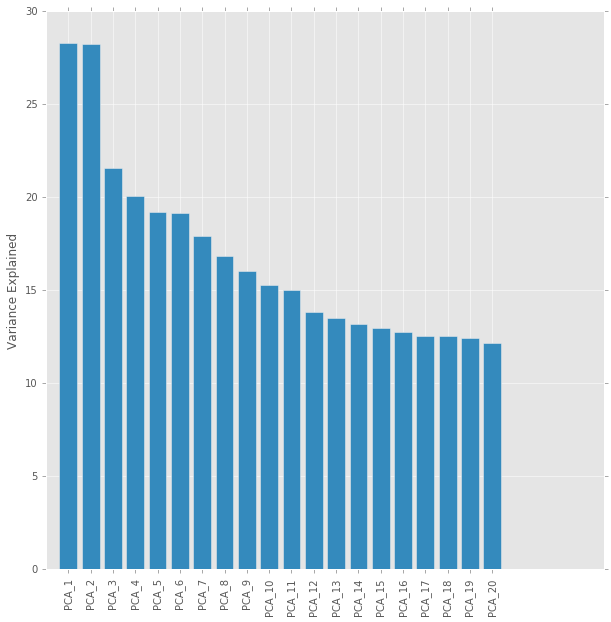

In [52]:
# To be implemented
n_col_to_display = 20

pca_range = np.arange(n_col_to_display) + 1
pca_names = ['PCA_%s' % i for i in pca_range]

plt.figure(figsize=(10, 10))
plt.bar(pca_range,
        pca.explained_variance_[:n_col_to_display],
        align='center')
xticks = plt.xticks(pca_range,
                    pca_names,
                    rotation=90)
plt.ylabel('Variance Explained')
plt.show()

## Classifying positive/negative review with PCA preprocessing

### Logistic Regression Classifier
#### Use standardized tf-idf vectors as features

In [53]:
# Build a Logistic Regression Classifier, train with standardized tf-idf vectors

from sklearn.linear_model import LogisticRegression

# To be implemented

model_lrc = LogisticRegression()

model_lrc.fit(x_train_scale, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [54]:
# Get score for training set
model_lrc.score(x_train_scale, y_train)

1.0

In [55]:
# Get score for test set

model_lrc.score(x_test_scale, y_test)

0.71649484536082475

Very overfitting!

#### Use (Stardardized + PCA) tf-idf vectors as features

In [56]:
# Build a Logistic Regression Classifier, train with PCA tranformed X

from sklearn.linear_model import LogisticRegression

# To be implemented

model_lrc_pca = LogisticRegression()

model_lrc_pca.fit(train_components, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [57]:
# Get score for training set
model_lrc_pca.score(train_components, y_train)

0.75911602209944751

In [58]:
# Get score for test set, REMEMBER to use PCA-transformed X!

model_lrc_pca.score(test_components, y_test)

0.71907216494845361

#### Q: What do you see from the training score and the test score? How do you compare the results from PCA and non-PCA preprocessing?

A: By comparing the results from PCA and non-PCA, we can see that the Stardardized + PCA has much reduced the overfitting probelm.

#### You can plot the coefficients against principal components


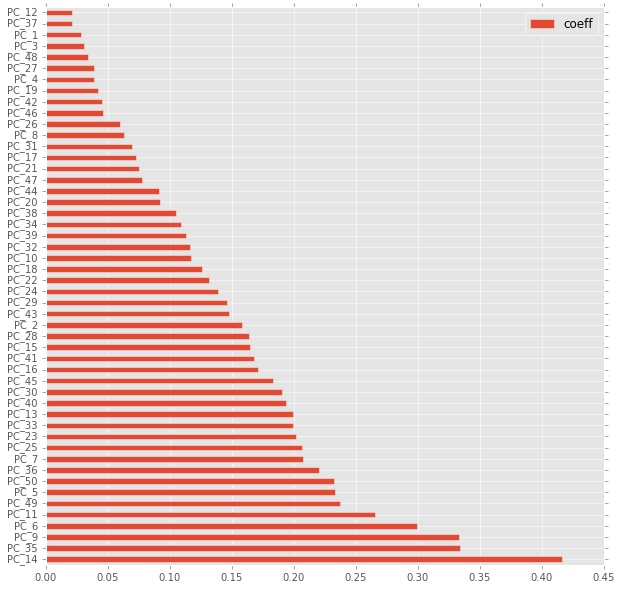

In [59]:
# To be implemented
pca_range = np.arange(pca.n_components_) + 1
pca_names = ['PC_%s' % i for i in pca_range]

df_coeffs = pd.DataFrame(list(zip(pca_names, abs(model_lrc_pca.coef_.flatten())))).sort_values(by=[1], ascending=False)
df_coeffs.columns = ['PCs', 'coeff']

ax = df_coeffs.plot.barh(figsize=(10, 10))
t = np.arange(pca.n_components_)
ax.set_yticks(t)
ax.set_yticklabels(df_coeffs['PCs'])
plt.show()

### Random Forest Classifier
#### Use standardized tf-idf vectors as features

In [60]:
# Build a Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier

# To be implemented
model_rf = RandomForestClassifier()

model_rf.fit(x_train_scale, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [61]:
# Get score for training set
model_rf.score(x_train_scale, y_train)

0.98342541436464093

In [62]:
# Get score for test set
model_rf.score(x_test_scale, y_test)

0.70618556701030932

Also overfitting!

#### Use (Stardardized + PCA) tf-idf vectors as features

In [63]:
# Build a Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier

# To be implemented
model_rf_pca = RandomForestClassifier()

model_rf_pca.fit(train_components, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [64]:
# Get score for training set
model_rf_pca.score(train_components, y_train)

0.9823204419889503

In [65]:
# Get score for test set, REMEMBER to use PCA-transformed X!
model_rf_pca.score(test_components, y_test)

0.67268041237113407

#### Q: What do you see from the training result and the test result?

A: With the random forest model, applying PCA didn't help the overfitting problem.

#### You can plot the feature importances against principal components


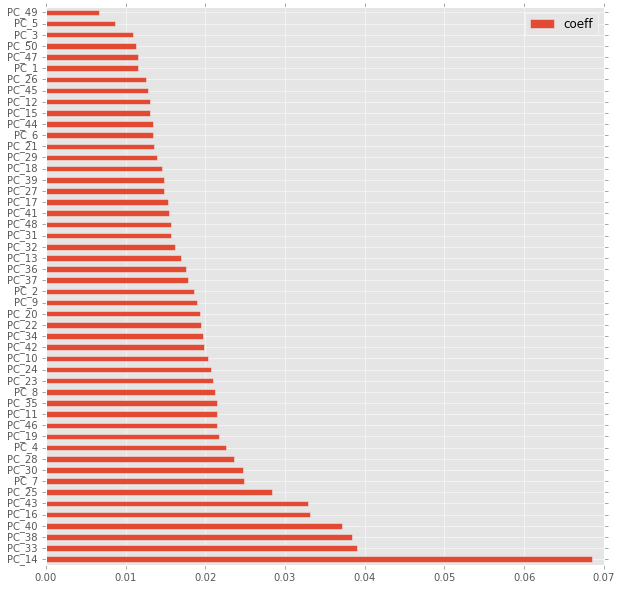

In [66]:
# To be implemented
pca_range = np.arange(pca.n_components_) + 1
pca_names = ['PC_%s' % i for i in pca_range]

df_coeffs = pd.DataFrame(list(zip(pca_names, abs(model_rf_pca.feature_importances_)))).sort_values(by=[1], ascending=False)
df_coeffs.columns = ['PCs', 'coeff']

ax = df_coeffs.plot.barh(figsize=(10, 10))
t = np.arange(pca.n_components_)
ax.set_yticks(t)
ax.set_yticklabels(df_coeffs['PCs'])
plt.show()

## Extra Credit #1: Can you cluster restaurants from their category information?
Hint: a business may have mutiple categories, e.g. a restaurant can have both "Restaurants" and "Korean"

In [67]:
# To be implemented
category = df['categories'].values
category

array(['[Cajun/Creole, Steakhouses, Restaurants]',
       '[Cajun/Creole, Steakhouses, Restaurants]',
       '[Cajun/Creole, Steakhouses, Restaurants]', ...,
       '[Vegetarian, Restaurants, Mexican]',
       '[Vegetarian, Restaurants, Mexican]',
       '[Vegetarian, Restaurants, Mexican]'], dtype=object)

In [68]:
df['favorable'] = df['stars']>4
target = df['favorable'].values

In [69]:
from sklearn.cross_validation import train_test_split
cate_train, cate_test, y_train, y_test = train_test_split(category, target, test_size=0.3, random_state=42)

In [70]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words = 'english', max_features = 3000)
vectors_train_category = vectorizer.fit_transform(cate_train).toarray()
words_category = vectorizer.get_feature_names()
vectors_category = vectorizer.transform(category).toarray()

In [71]:
from sklearn.cluster import KMeans
kmeans = KMeans(random_state=42)
kmeans.fit(vectors_train_category)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=8, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=42, tol=0.0001,
    verbose=0)

In [72]:
target_labels = kmeans.predict(vectors_category)

In [73]:
print kmeans.cluster_centers_

[[ -2.37440276e-17   7.40471211e-03   8.18333989e-03 ...,   1.00119294e-18
    1.33401708e-02  -3.94215910e-16]
 [  1.48535698e-16   9.28077060e-17  -5.52943108e-17 ...,   1.64154985e-18
    3.80121282e-16   1.39645240e-16]
 [  2.59883261e-16  -5.16947596e-16  -6.26668856e-17 ...,  -3.56600871e-18
    5.54027310e-16   4.54063870e-16]
 ..., 
 [  2.31910845e-16   1.53312201e-03  -6.09321621e-17 ...,  -2.15823995e-18
    2.07937240e-03   3.74700271e-16]
 [  2.88289358e-16   8.82546405e-03  -6.46184495e-17 ...,  -4.99241219e-18
    3.39572120e-16   5.33861150e-16]
 [  7.42678488e-17   9.15066634e-17  -5.03069808e-17 ...,   1.44503821e-18
    2.64328490e-16  -7.02563008e-17]]


In [74]:
n = 10
top_centroids = kmeans.cluster_centers_.argsort()[:,-1:-n:-1]

a = np.random.randn(10)
a

array([ 0.20231625, -0.02692704, -0.96572502, -1.76942099, -1.77597561,
        1.36803138, -2.07970511,  0.99877004, -0.06498306, -1.65802386])

In [75]:
for num, centroid in enumerate(top_centroids):
    print (num,",".join(words[i] for i in centroid))

(0, u'advantage,asian,aware,65,bazaar,bagel,america,agree,attentiveness')
(1, u'banana,anniversary,27,attentiveness,aioli,2016,asking,avocados,aloha')
(2, u'36,3pm,13,attentiveness,available,bartender,agree,3x,added')
(3, u'attentiveness,asia,animal,8pm,bardot,avocados,26,bakery,anticipated')
(4, u'agree,advice,attentiveness,bao,400,ad,absolute,baguette,available')
(5, u'13,arcade,bartender,400,attentiveness,bakery,avocados,bag,available')
(6, u'27,areas,13,bed,able,attentiveness,arcade,baja,bartender')
(7, u'appointment,attentiveness,bang,advice,areas,27,agree,apples,barbecue')


In [76]:
for i in range(kmeans.n_clusters):
    cluster = np.arange(0, vectors_documents.shape[0])[assigned_cluster==i]
    sample_reviews = np.random.choice(cluster, 2, replace=False)
    for review_index in sample_reviews:
        print df.ix[review_index]['stars'],
        print df.ix[review_index]['text']
    print

2 Maybe our expectations were higher than they should have been  .. the Tuna pizza was tasty. 
The large $200 chefs choice Sushi was presented well but for that much money it was lack luster at best. The sauce they put on the whole fried fish was disgusting! And trying to get a chicken dish for my mother-in-law with out being all curry sauced up proved to cause us to be served a mediocre chicken and potatoes dish. The medallion potatoes were dry and flavorless. We didn't eat them, nor did we eat much of the chicken. Oh and the specialty cocktail tasted horrible, we didn't drink it either. 
For such an upscale restaurant you'd think they would notice what we didn't eat or drink... nope!
5 This is my favorite dining restaurant.
I really like the decorations 
Spicy chicken wing is a must!!!!
All staff is so nice and gentle.
I surely visit again and again.

1 Horrible pizza. They only give you 1 little pack of  parmesan cheese and hot peppers.  How cheap is that.  Pizza is dry as a bone to

## Extra Credit #2: Can you try different distance/similarity metrics for clusterings, e.g. Pearson correlation, Jaccard distance, etc. 

Hint: You can take a look at [scipy](http://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.pdist.html#scipy.spatial.distance.pdist) documentations to use other distances

#### Q: How do you compare with Cosine distance or Euclidean distance?

In [77]:
# To be implemented
#kmeans = KMeans(random_state=42, )

#kmeans.fit(vectors_train)

In [78]:
import nltk
from scipy.spatial.distance import cdist
from nltk.cluster.kmeans import KMeansClusterer

In [80]:
NUM_CLUSTERS = 5
data = doc_vector_top

# clustering using cosine_distance
kclusterer_cos = KMeansClusterer(NUM_CLUSTERS, distance=nltk.cluster.util.cosine_distance, repeats=10)
assigned_clusters_cos = kclusterer_cos.cluster(data, assign_clusters=True)

## Extra Credit #3: Can you cluster categories from business entities? What does it mean by a cluster?
Hint: Think the example where words can be clustered from the transposed tf-idf matrix.

What is the difference between "business entities" and the "category" of a business?  Are they the same thing? <br>
I assume they are not, otherwise this question would be the same as Extra Credit #1.<br>
Here, from looking at the df, the columns that representing business are "bueiness_id", "name", and "category".  <br>
So, the below cluster will base on the info from "bueiness_id", "name", and "category" columns, representing "business entities".<br>

In [81]:
# To be implemented
entities = df[['business_id', 'name', 'categories']]
entities = entities.drop_duplicates()
category = entities['categories'].values

In [82]:
vectorizer_top = TfidfVectorizer(stop_words = 'english', max_features = 5000)

In [83]:
train_vector_top = vectorizer_top.fit_transform(category).toarray()

In [84]:
category_vector = vectorizer.transform(category).toarray()

In [85]:
category_vector

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [86]:
vocab_top = vectorizer_top.get_feature_names()

In [87]:
train_vector_top

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [88]:
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans_cluster = kmeans.fit(train_vector_top)


In [89]:
print kmeans.cluster_centers_

[[  4.77048956e-18   4.33680869e-18   1.35525272e-18 ...,  -2.43945489e-19
    2.60208521e-18   3.94432752e-03]
 [  3.79470760e-18  -3.68628739e-18   1.24683250e-18 ...,   6.77626358e-19
    1.69135539e-17   3.55618313e-17]
 [  1.88121503e-03   2.94737738e-03   4.02791495e-04 ...,   3.01788490e-04
    4.15251660e-03   8.95745367e-03]
 [ -1.35525272e-17   9.52881047e-04  -1.89735380e-18 ...,  -1.97866896e-18
    1.43871107e-03  -5.72458747e-17]
 [  2.92734587e-18  -1.12757026e-17   1.19262239e-18 ...,   3.25260652e-19
    1.12757026e-17   3.20923843e-17]]


In [90]:
import numpy as np

# We will need these helper methods pretty soon

def get_top_values(lst, n, labels):
    '''
    INPUT: LIST, INTEGER, LIST
    OUTPUT: LIST

    Given a list of values, find the indices with the highest n values.
    Return the labels for each of these indices.

    e.g.
    lst = [7, 3, 2, 4, 1]
    n = 2
    labels = ["cat", "dog", "mouse", "pig", "rabbit"]
    output: ["cat", "pig"]
    '''
    return [labels[i] for i in np.argsort(lst)[::-1][:n]]  # np.argsort by default sorts values in ascending order

def get_bottom_values(lst, n, labels):
    '''
    INPUT: LIST, INTEGER, LIST
    OUTPUT: LIST

    Given a list of values, find the indices with the lowest n values.
    Return the labels for each of these indices.

    e.g.
    lst = [7, 3, 2, 4, 1]
    n = 2
    labels = ["cat", "dog", "mouse", "pig", "rabbit"]
    output: ["mouse", "rabbit"]
    '''
    pass  # To be implemented



In [91]:
n = 10
top_centroids = kmeans.cluster_centers_.argsort()[:,-1:-n:-1]

a = np.random.randn(10)
a

array([ 0.54230895,  0.2082081 , -0.73081438,  0.0727607 , -0.55991212,
       -0.44756505,  0.06370506,  0.20935079,  2.27106035, -1.29210237])

In [92]:
for index, point in enumerate(kmeans_cluster.cluster_centers_):
    print('%d center has the top prominent words:' % (index))
    print(get_top_values(point, 20, words))

0 center has the top prominent words:
[u'advice', u'agree', u'400', u'attitude', u'average', u'8pm', u'8am', u'beers', u'13', u'bartenders', u'acting', u'addition', u'ambience', u'af', u'asian', u'authenticity', u'area', u'basil', u'24', u'avoid']
1 center has the top prominent words:
[u'appreciate', u'attitude', u'advice', u'agree', u'bardot', u'appointment', u'banh', u'avoid', u'aren', u'3pm', u'36', u'27', u'anytime', u'basil', u'13', u'ad', u'baked', u'bathrooms', u'bathroom', u'400']
2 center has the top prominent words:
[u'attitude', u'asian', u'agree', u'average', u'8pm', u'animal', u'8am', u'beers', u'avoid', u'acting', u'away', u'authenticity', u'49', u'26', u'bare', u'bar', u'advantage', u'36', u'3pm', u'absolute']
3 center has the top prominent words:
[u'13', u'27', u'bartenders', u'aren', u'area', u'attitude', u'36', u'3pm', u'bake', u'atleast', u'400', u'baklava', u'beef', u'added', u'avoid', u'agree', u'average', u'able', u'app', u'admittedly']
4 center has the top promin

## Extra Credit #4: What are the characteristics of each of the clustered  ? For each cluster, which restaurant can best represent ("define") its cluster?
Hint: how to interpret "best"?

Here I define the "best" representation of a cluster as the value point that is closest to its cluster center, i.e. the distance between the point and the cluster center is the smallest.  That point is defined as the most representative of its cluster.

In [235]:
# To be implemented
restaurant = df.name.unique()
best_rep = kmeans.cluster_centers_.argsort()[:, -1] 
# argsort orders from small to big, -1 is used to select the one with highest weight in the centroid vector..
for i, rep in enumerate(best_rep):
    print "Cluster %i: Best represent Restaurant %s" % (i, restaurant[i] )

Cluster 0: Best represent Restaurant Delmonico Steakhouse
Cluster 1: Best represent Restaurant Bavette's Steakhouse & Bar
Cluster 2: Best represent Restaurant Michael Mina
Cluster 3: Best represent Restaurant Sin City Thai Restaurant
Cluster 4: Best represent Restaurant Fresh Buffet


## Extra Credit #5: Can you think of other use cases that clustering can be used? 
Hint: of course you can make use of other yelp dataset. You can try anything you want as long as you can explain it.

This clustering + TF-IDF technique can also be used for book/ artical recommendation.  <br>
Clustering along can also be used to find pattern in data.  For example, subset user data into subgroups.